Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score


sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')


Netfix Theme

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
sns.set_style("darkgrid", {"axes.facecolor": "#141414"})  
netflix_red = "#E50914"
netflix_gray = "#808080"

plt.rcParams.update({
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'figure.facecolor': '#141414',
    'text.color': 'white',
})


Dataset Load

In [4]:
df = pd.read_csv('netflix_data.csv', encoding='latin1') 
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Basics and Nulls

In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64

Data Cleaning

In [6]:
df.dropna(subset=['type', 'title', 'country', 'release_year'], inplace=True)

df.fillna('Not Specified', inplace=True)

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['year_added'] = df['date_added'].dt.year

df['month_added'] = df['date_added'].dt.month

Content Type Breakdown

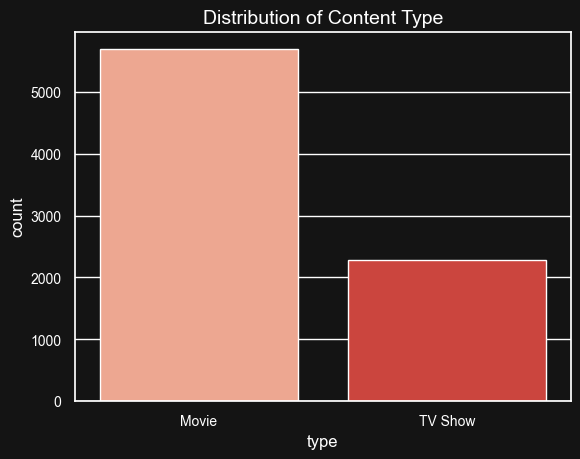

In [7]:
sns.countplot(data=df, x='type', palette='Reds')
plt.title('Distribution of Content Type')
plt.show()

Top Producing Countries

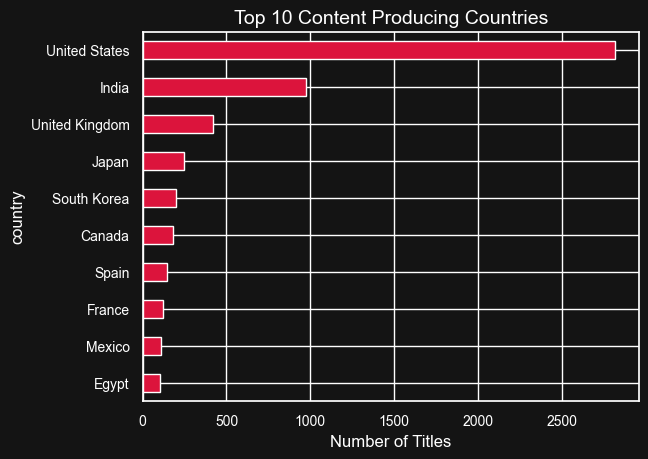

In [8]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='crimson')
plt.title('Top 10 Content Producing Countries')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.show()

Genre

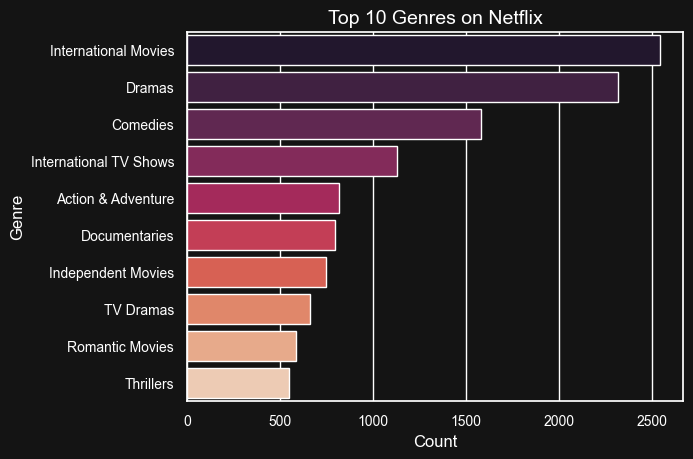

In [9]:
from collections import Counter

all_genres = df['listed_in'].str.split(', ').sum()
genre_counts = Counter(all_genres)
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

sns.barplot(data=top_genres, y='Genre', x='Count', palette='rocket')
plt.title('Top 10 Genres on Netflix')
plt.show()

Content Release In Years

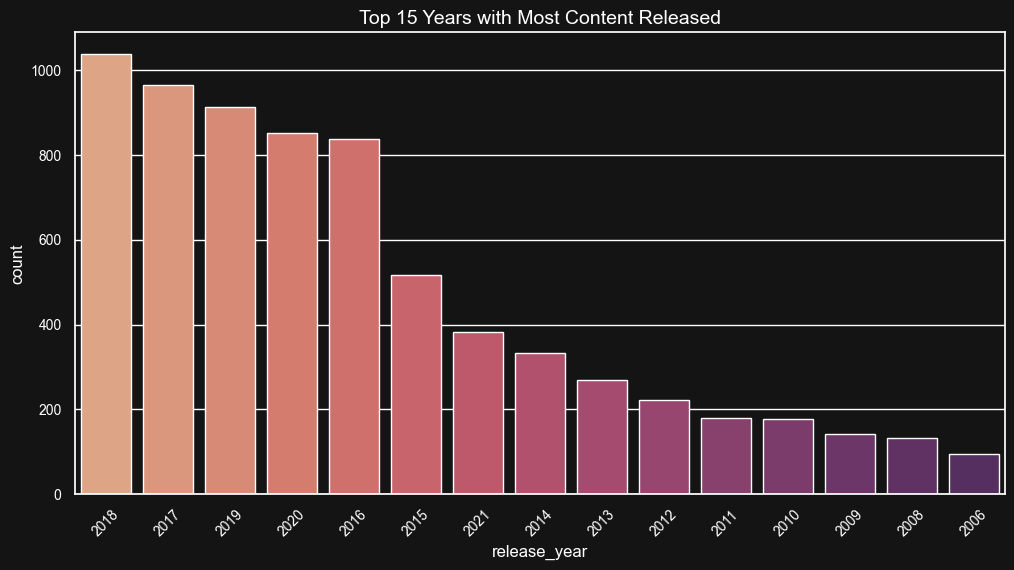

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='release_year', order=df['release_year'].value_counts().index[:15], palette='flare')
plt.title('Top 15 Years with Most Content Released')
plt.xticks(rotation=45)
plt.show()

Top Actors and Directors

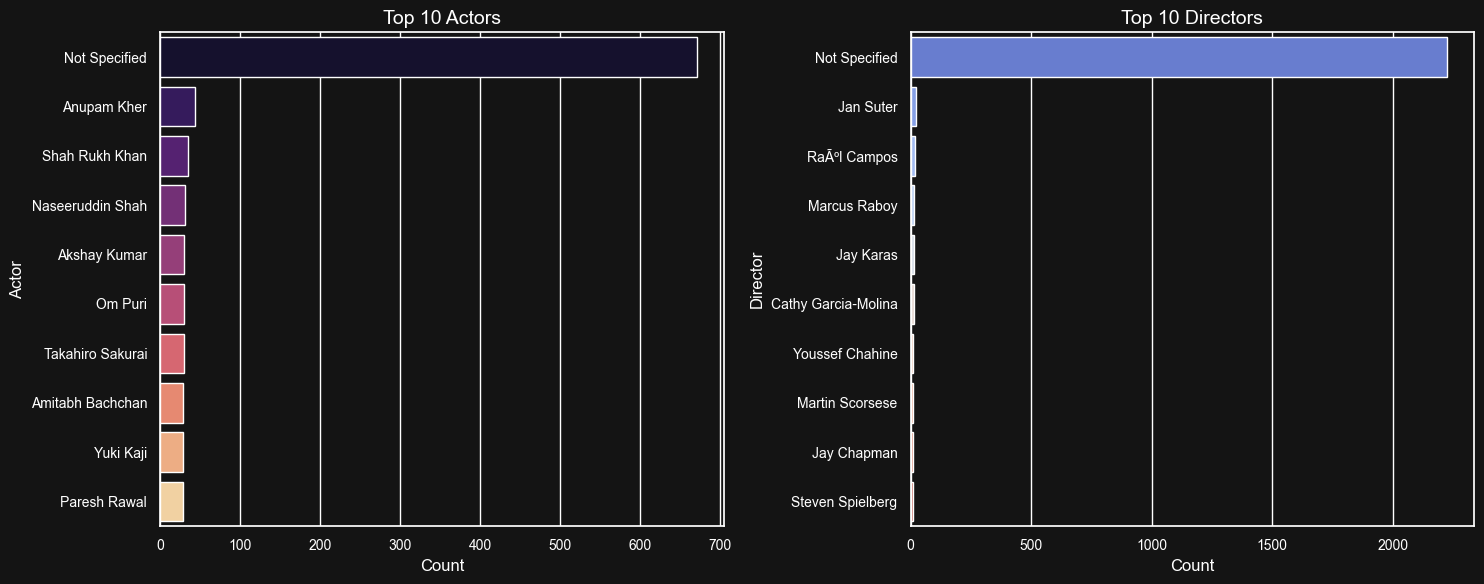

In [11]:
from itertools import chain

# actors
actors = df['cast'].str.split(', ').dropna()
actor_counts = Counter(chain.from_iterable(actors))
top_actors = pd.DataFrame(actor_counts.most_common(10), columns=['Actor', 'Count'])

# directors
directors = df['director'].str.split(', ').dropna()
director_counts = Counter(chain.from_iterable(directors))
top_directors = pd.DataFrame(director_counts.most_common(10), columns=['Director', 'Count'])

# both
fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.barplot(data=top_actors, y='Actor', x='Count', ax=ax[0], palette='magma')
ax[0].set_title("Top 10 Actors")

sns.barplot(data=top_directors, y='Director', x='Count', ax=ax[1], palette='coolwarm')
ax[1].set_title("Top 10 Directors")

plt.tight_layout()
plt.show()


Classify as Movie or TV Show (RF ML Model)

In [12]:
model_df = df[['type', 'release_year', 'duration', 'listed_in', 'country']].copy()

le = LabelEncoder()
model_df['country'] = le.fit_transform(model_df['country'])
model_df['listed_in'] = le.fit_transform(model_df['listed_in'])
model_df['duration'] = model_df['duration'].str.extract('(\d+)').fillna(0).astype(int)
model_df['type'] = model_df['type'].map({'Movie': 0, 'TV Show': 1})

X = model_df.drop('type', axis=1)
y = model_df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9981203007518797

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1133
           1       0.99      1.00      1.00       463

    accuracy                           1.00      1596
   macro avg       1.00      1.00      1.00      1596
weighted avg       1.00      1.00      1.00      1596



Top 10 countries with most content

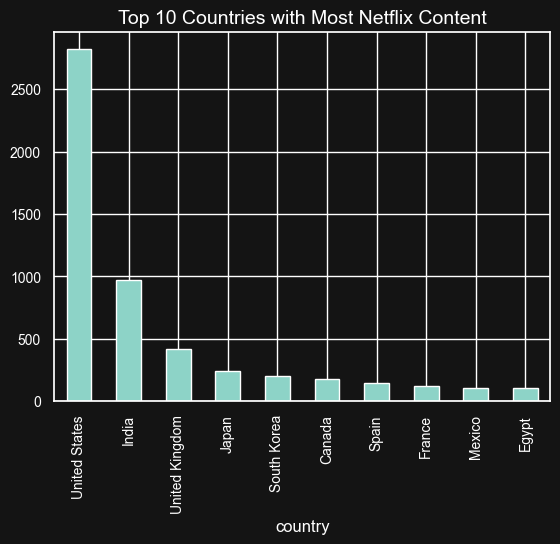

In [13]:
df['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries with Most Netflix Content')
plt.show()

Trend Plot (Genre Distribution Over Time)

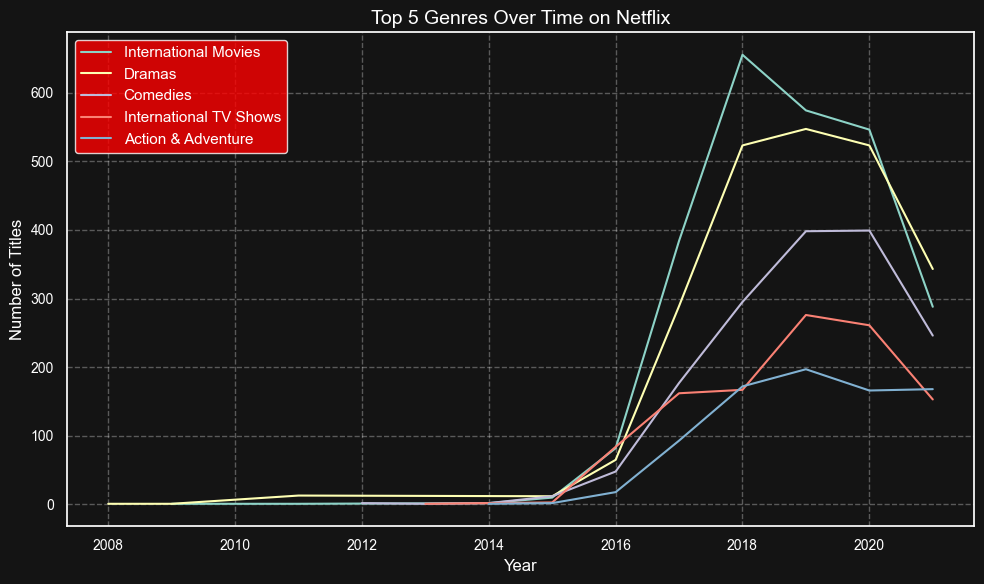

In [14]:
df['release_year'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year

df_exploded = df.dropna(subset=['listed_in', 'release_year']).copy()
df_exploded['Genre'] = df_exploded['listed_in'].str.split(', ')
df_exploded = df_exploded.explode('Genre')

genre_trend = df_exploded.groupby(['release_year', 'Genre']).size().reset_index(name='Count')

top5_genres = genre_trend.groupby('Genre')['Count'].sum().sort_values(ascending=False).head(5).index
plt.figure(figsize=(10,6))

for genre in top5_genres:
    genre_data = genre_trend[genre_trend['Genre'] == genre]
    plt.plot(genre_data['release_year'], genre_data['Count'], label=genre)

plt.title('Top 5 Genres Over Time on Netflix', fontsize=14, color='white')
plt.xlabel('Year', color='white')
plt.ylabel('Number of Titles', color='white')
plt.legend(facecolor="#FF0000", edgecolor='white')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Genre vs Country (Heatmap)

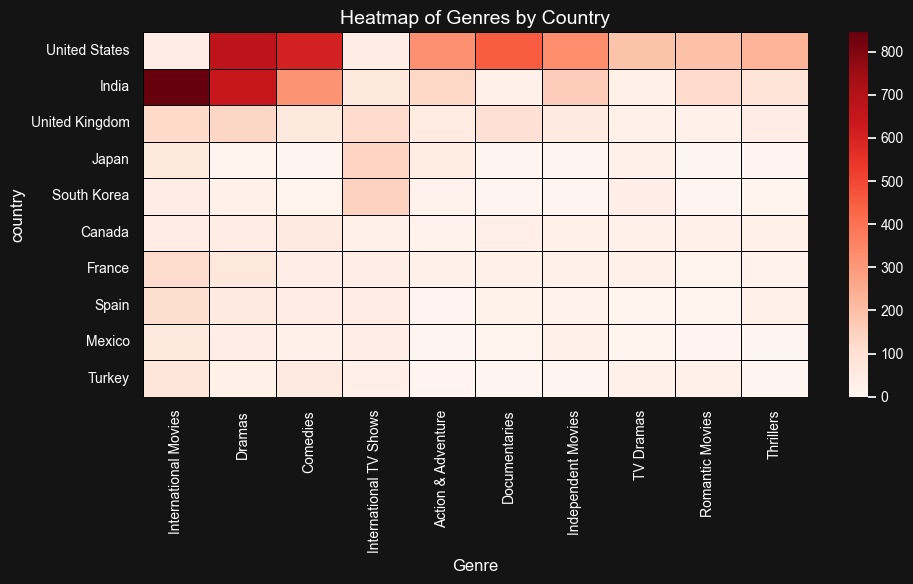

In [15]:
df_country = df_exploded.dropna(subset=['country']).copy()
df_country['country'] = df_country['country'].str.split(', ').str[0]

country_genre = df_country.groupby(['country', 'Genre']).size().unstack().fillna(0)

top_countries = country_genre.sum(axis=1).sort_values(ascending=False).head(10).index
top_genres = country_genre.sum(axis=0).sort_values(ascending=False).head(10).index
filtered_heatmap = country_genre.loc[top_countries, top_genres]

plt.figure(figsize=(10,6))
sns.heatmap(filtered_heatmap, cmap='Reds', linewidths=0.5, linecolor='black')
plt.title('Heatmap of Genres by Country', fontsize=14, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.tight_layout()
plt.show()


The Rise of K-Drama in India

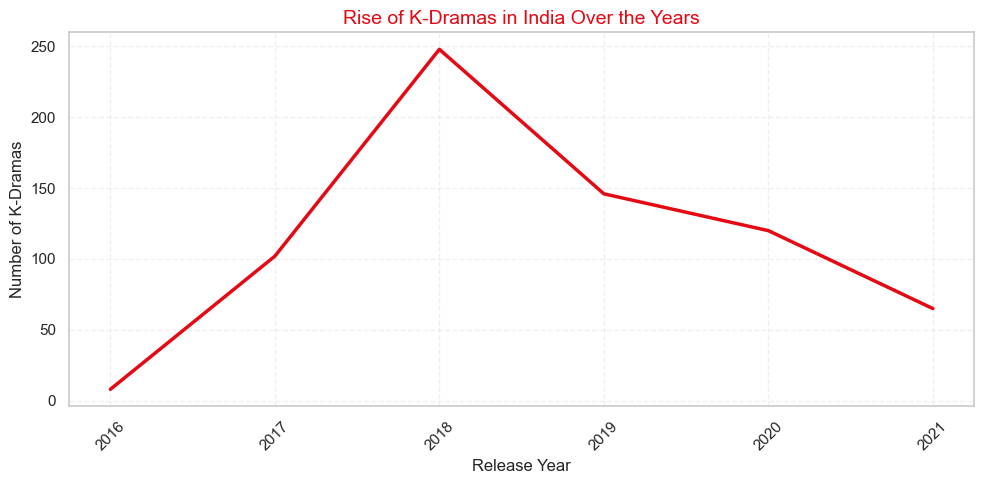

Some popular K-Dramas in India on Netflix:

                         title  release_year
913              Time to Dance        2021.0
873                      Ahaan        2021.0
909                  Milestone        2021.0
903                    Nayattu        2021.0
892   Tottaa Pataaka Item Maal        2021.0
850                   99 Songs        2021.0
871         Sardar Ka Grandson        2021.0
736                Skater Girl        2021.0
735                    Sarbath        2021.0
1202               C/O Kaadhal        2021.0


In [16]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

netflix_red = '#E50914'
sns.set(style='whitegrid')

k_drama_df = df[
    (df['country'].str.contains('India', na=False)) & 
    (df['listed_in'].str.contains('Korean|Dramas', case=False, na=False))
]

kdrama_trend = k_drama_df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=kdrama_trend.index, y=kdrama_trend.values, color=netflix_red, linewidth=2.5)
plt.title('Rise of K-Dramas in India Over the Years', fontsize=14, color=netflix_red)
plt.xlabel('Release Year')
plt.ylabel('Number of K-Dramas')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Show sample titles
print("Some popular K-Dramas in India on Netflix:\n")
print(k_drama_df[['title', 'release_year']].sort_values(by='release_year', ascending=False).head(10))


In [17]:
!pip install wordcloud

Viewer Hook Analysis

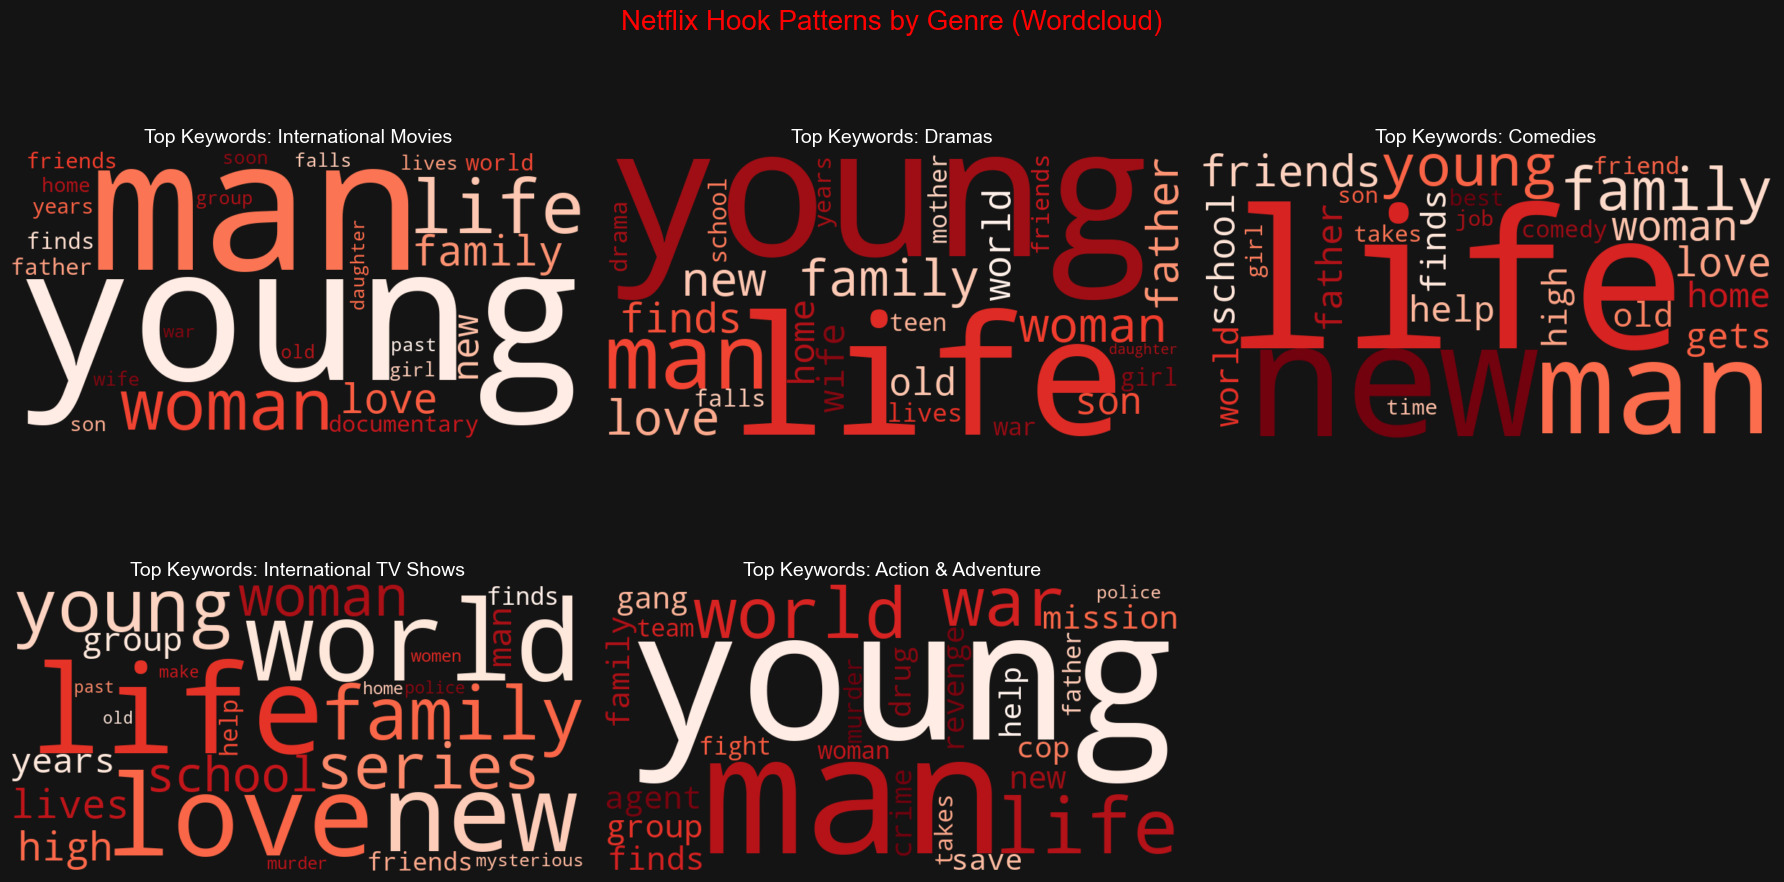

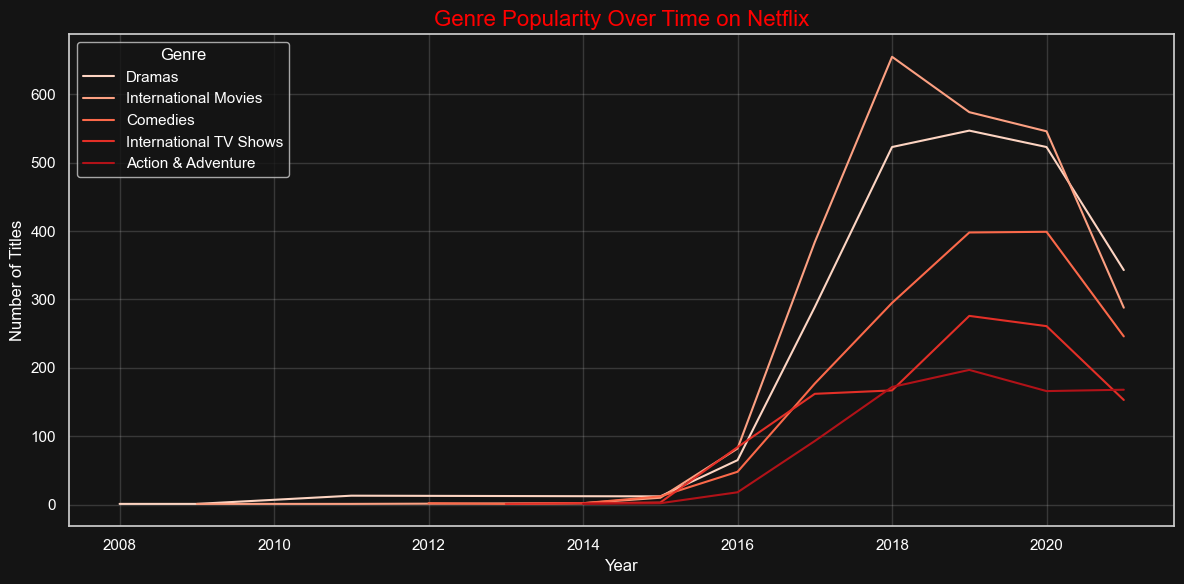

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime
import matplotlib as mpl

mpl.rcParams['axes.facecolor'] = '#141414'
mpl.rcParams['figure.facecolor'] = '#141414'
mpl.rcParams['axes.labelcolor'] = 'white'
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'
mpl.rcParams['text.color'] = 'white'

df['release_year'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
df.dropna(subset=['description', 'listed_in', 'release_year'], inplace=True)
df['listed_in'] = df['listed_in'].str.split(', ')
df = df.explode('listed_in')

top_genres = df['listed_in'].value_counts().head(5).index.tolist()
df_top = df[df['listed_in'].isin(top_genres)]

genre_keywords = {}
tfidf = TfidfVectorizer(stop_words='english', max_features=100)

for genre in top_genres:
    descs = df_top[df_top['listed_in'] == genre]['description']
    X = tfidf.fit_transform(descs)
    scores = X.toarray().sum(axis=0)
    words = [(word, scores[idx]) for word, idx in tfidf.vocabulary_.items()]
    genre_keywords[genre] = dict(sorted(words, key=lambda x: x[1], reverse=True)[:25])

plt.figure(figsize=(18, 10))
for i, genre in enumerate(top_genres):
    plt.subplot(2, 3, i+1)
    wc = WordCloud(width=800, height=400, background_color='#141414',
                   colormap='Reds').generate_from_frequencies(genre_keywords[genre])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Top Keywords: {genre}", fontsize=14, color='white')

plt.suptitle('Netflix Hook Patterns by Genre (Wordcloud)', fontsize=20, color='red')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
genre_year = df_top.groupby(['release_year', 'listed_in']).size().reset_index(name='count')
sns.lineplot(data=genre_year, x='release_year', y='count', hue='listed_in', palette='Reds')

plt.title('Genre Popularity Over Time on Netflix', fontsize=16, color='red')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(alpha=0.2)
plt.legend(title='Genre', loc='upper left')
plt.tight_layout()
plt.show()


Ratio of TV Shows to Movies in the 5 years (Donut Chart)

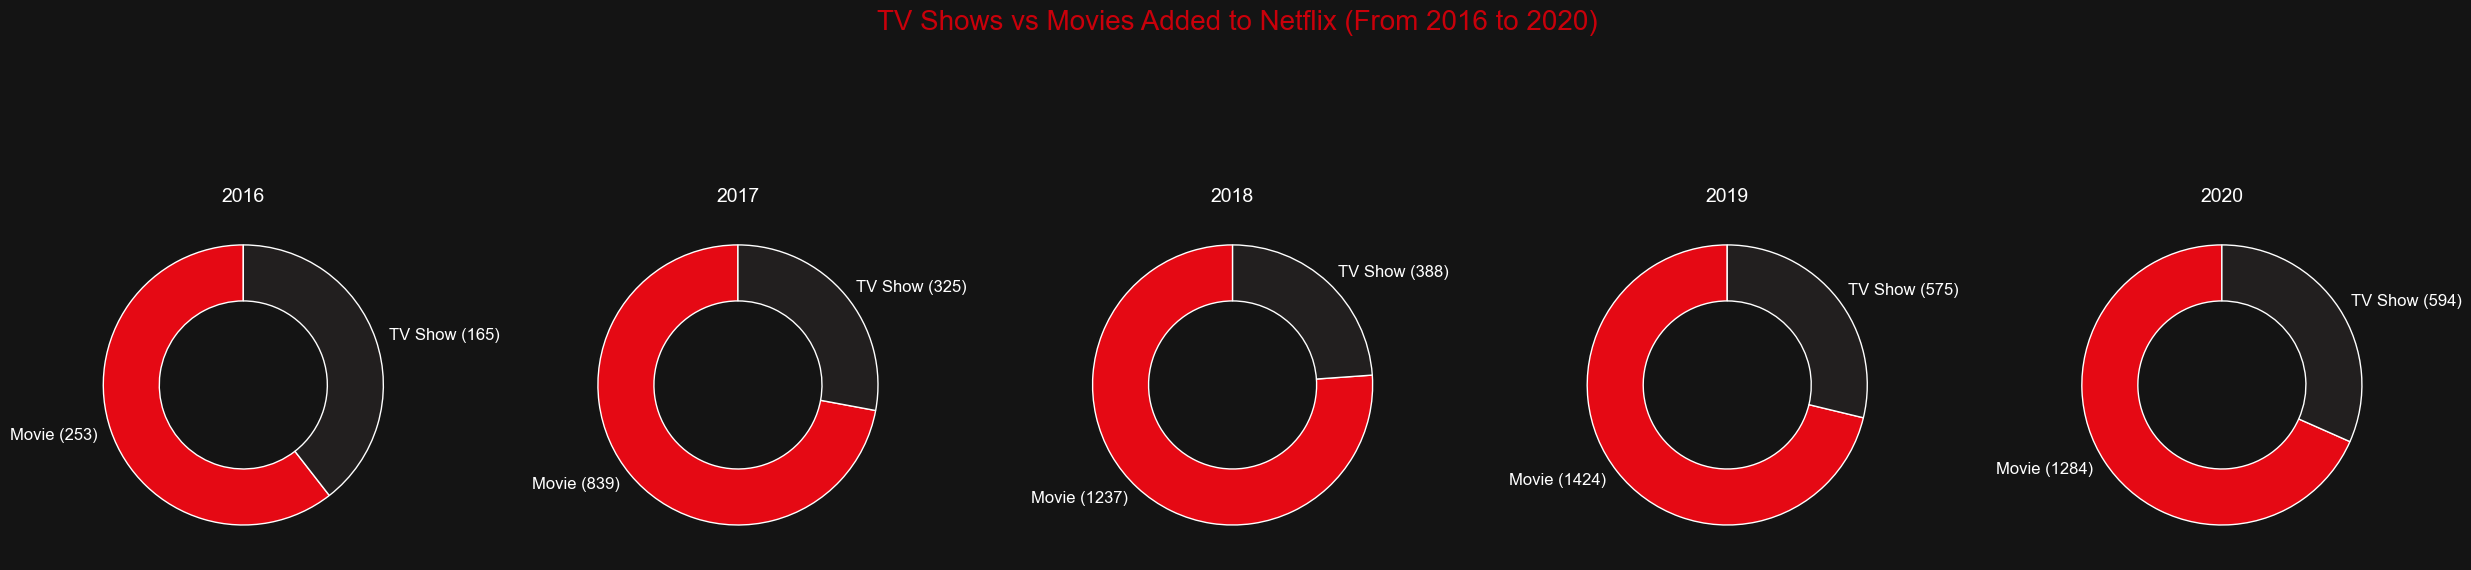

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('netflix_data.csv', encoding='latin1')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

colors = ['#E50914', '#221f1f']
background = '#141414'
label_font = {'color': 'white', 'fontsize': 12}
title_font = {'color': 'white', 'fontsize': 14}

years = [2016, 2017, 2018, 2019, 2020]

fig, axs = plt.subplots(1, 5, figsize=(25, 7), facecolor=background)

for i, year in enumerate(years):
    data = df[df['year_added'] == year]['type'].value_counts()
    labels = [f"{label} ({count})" for label, count in zip(data.index, data)]
    
    axs[i].pie(
        data, labels=labels, startangle=90, colors=colors,
        wedgeprops=dict(width=0.4),
        textprops=label_font
    )
    axs[i].set_title(f'{year}', fontdict=title_font)
    axs[i].set_facecolor(background)


plt.suptitle('TV Shows vs Movies Added to Netflix (From 2016 to 2020)', color="#C9000A", fontsize=20)
plt.subplots_adjust(wspace=0.4)
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()


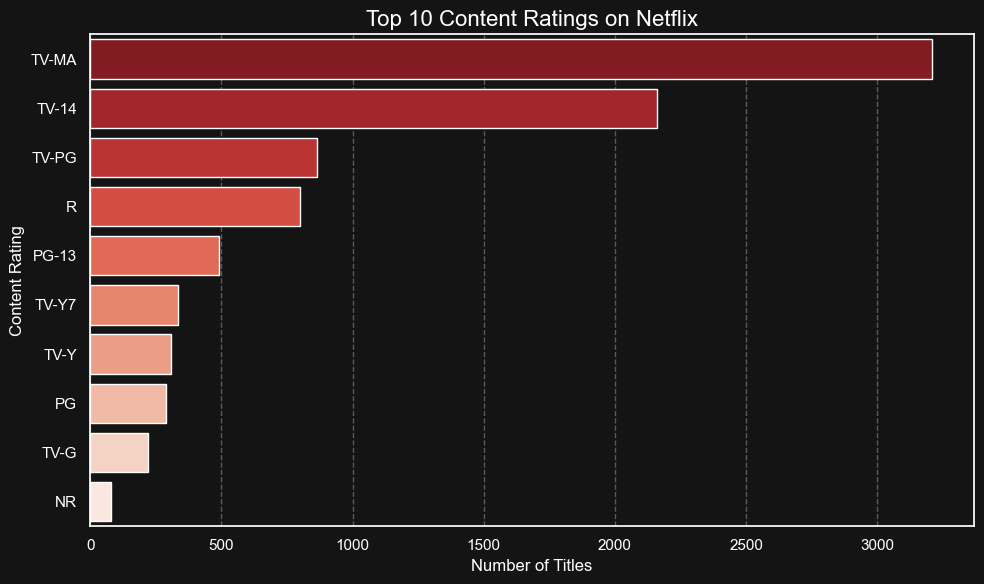

In [ ]:
import squarify

rating_counts = df['rating'].dropna().value_counts().head(10)

plt.figure(figsize=(10, 6))
colors = [plt.cm.Reds(i/len(rating_counts)) for i in range(len(rating_counts))]
squarify.plot(sizes=rating_counts.values, label=rating_counts.index,
              color=colors, text_kwargs={'color':'white', 'fontsize':12})
plt.title("Top 10 Content Ratings on Netflix", color='white', fontsize=16)
plt.axis('off')
plt.gca().set_facecolor('#141414')
plt.tight_layout()
plt.show()
